In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import multipolefield as mpf

In [2]:
# Generate some magnetic fields
magfield = mpf.Bfield([0.,0.,1.], jnp.array([1.,0.5,0.5]))
pure_dip = mpf.Bfield([0.,0.,1.], jnp.array([1.,0.,0.]))

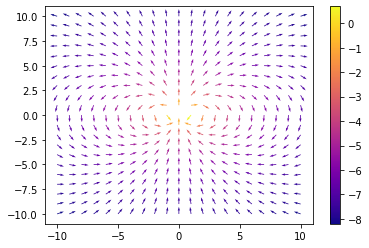

In [3]:
# Make a mesh for 2D plotting
xs = jnp.linspace(-10.,10.,21)
ys = jnp.zeros_like(xs)
zs = jnp.linspace(-10.,10.,21)

Xs, Zs = jnp.meshgrid(xs, zs, indexing='ij')

# Generate the vectorized functions from the scalar functions
magfield_vNv = jax.vmap(magfield.vector, in_axes=(0,None,0), out_axes=0)
magfield_mNm = jax.vmap(magfield_vNv, in_axes=(1,None,1), out_axes=0)

bfield_mNm_norms = jnp.linalg.norm(magfield_mNm(Xs, 0.0, Zs), axis=0).T

plt.quiver(Zs, Xs, \
        magfield_mNm(Xs, 0.0, Zs)[0]/bfield_mNm_norms.T, magfield_mNm(Xs, 0.0, Zs)[2]/bfield_mNm_norms.T, \
        jnp.log(bfield_mNm_norms), cmap='plasma')
plt.colorbar()

In [4]:
tilted_dipole = mpf.Bfield([0.0, 0.0, 1.0], jnp.array([1.,0.,0.]))

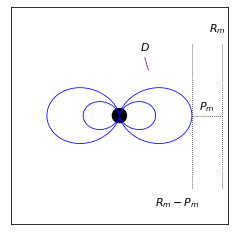

In [5]:
xs = jnp.linspace(-1.5,1.5,501)
zs = jnp.linspace(-1.5,1.5,501)

Xs, Zs = jnp.meshgrid(xs, zs, indexing='ij')

fieldline_vNv = jax.vmap(tilted_dipole.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
fieldline_mNm = jax.vmap(fieldline_vNv, in_axes=(1,None,1), out_axes=0)

plt.contour(Zs, Xs, fieldline_mNm(Xs, 0.0, Zs), [0.5, 1.0], colors=['b','b'], linewidths=[0.8, 0.8])
plt.gca().set_aspect('equal', adjustable='box')
circle = plt.Circle((0,0), 0.1, color='black', fill=True)
plt.gca().add_artist(circle)
plt.plot([1.0, 1.0], [-1.0, 1.0], 'k:', lw=0.75)
plt.plot([1.415, 1.415], [-1.0, 1.0], 'k:', lw=0.75)
plt.plot([1.0, 1.415], [0.0, 0.0], 'k:', lw=0.75)
plt.plot([0.4, 0.35], [0.625, 0.8], 'k-', lw=0.75, color='purple')



plt.text(0.8, -1.2, r"$R_m - P_m$", fontsize=11, color='k', ha='center', va='center')
plt.text(1.35, 1.2, r"$R_m$", fontsize=11, color='k', ha='center', va='center')
plt.text(1.2, 0.125, r"$P_m$", fontsize=11, color='k', ha='center', va='center')
plt.text(0.35, 0.95, r"$D$", fontsize=11, color='k', ha='center', va='center')
plt.xticks([])
plt.yticks([])


# save as high resolution pdf
plt.savefig('dipole.pdf', dpi=300, bbox_inches='tight')

plt.show()

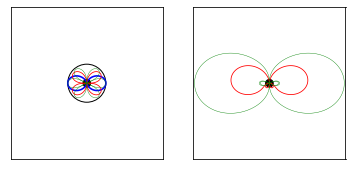

In [6]:
plotmagfield = mpf.Bfield([0.0, 0.0, 1.0], jnp.array([1.,0.,0.]))
quadmagfield = mpf.Bfield([0.0, 0.0, 1.0], jnp.array([0.,1.,0.]))
octmagfield = mpf.Bfield([0.0, 0.0, 1.0], jnp.array([0.,0.,1.]))

mixedmagfield = mpf.Bfield([0.0,0.0,1.0], jnp.array([1.0,0.0,0.25]))
quadmixmagfield = mpf.Bfield([0.0,0.0,1.0], jnp.array([1.0,0.25,0.0]))

xs = jnp.linspace(-2.0,2.0,501)
zs = jnp.linspace(-2.0,2.0,501)

Xs, Zs = jnp.meshgrid(xs, zs, indexing='ij')

fieldline_vNv = jax.vmap(plotmagfield.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
fieldline_mNm = jax.vmap(fieldline_vNv, in_axes=(1,None,1), out_axes=0)

quad_fieldline_vNv = jax.vmap(quadmagfield.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
quad_fieldline_mNm = jax.vmap(quad_fieldline_vNv, in_axes=(1,None,1), out_axes=0)

oct_fieldline_vNv = jax.vmap(octmagfield.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
oct_fieldline_mNm = jax.vmap(oct_fieldline_vNv, in_axes=(1,None,1), out_axes=0)

mixed_fieldline_vNv = jax.vmap(mixedmagfield.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
mixed_fieldline_mNm = jax.vmap(mixed_fieldline_vNv, in_axes=(1,None,1), out_axes=0)

quadmix_fieldline_vNv = jax.vmap(quadmixmagfield.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
quadmix_fieldline_mNm = jax.vmap(quadmix_fieldline_vNv, in_axes=(1,None,1), out_axes=0)

# figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,3))
ax1.contour(Zs, Xs, fieldline_mNm(Xs, 0.0, Zs), [1.0], colors=['b','b'], linewidths=[1.6])
ax1.contour(Zs, Xs, quad_fieldline_mNm(Xs, 0.0, Zs), [-1., 1.], colors=['r','r'], linewidths=[0.8, 0.8])
ax1.contour(Zs, Xs, oct_fieldline_mNm(Xs, 0.0, Zs), [-1.,1.], colors=['g','g'], linewidths=[0.4, 0.4])
ax1.set_aspect('equal', adjustable='box')

ax2.contour(Zs, Xs, quadmix_fieldline_mNm(Xs, 0.0, Zs), [-0.5, 0.5], colors=['r','r'], linewidths=[0.8, 0.8])
ax2.contour(Zs, Xs, mixed_fieldline_mNm(Xs, 0.0, Zs), [-0.25, 0.25], colors=['g','g'], linewidths=[0.4, 0.4])
ax2.set_aspect('equal', adjustable='box')

circle = plt.Circle((0,0), 0.1, color='black', fill=True)
circle2 = plt.Circle((0,0), 0.1, color='black', fill=True)
circle_test = plt.Circle((0,0), 0.5, color='black', fill=False)
ax1.add_artist(circle)
ax1.add_artist(circle_test)
ax2.add_artist(circle2)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

plt.show()

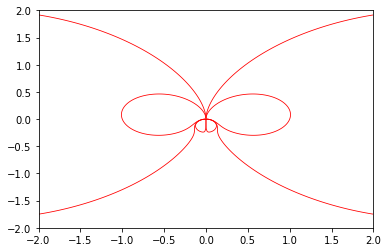

In [8]:
# plot the dipole + quadrupole field
fig = plt.figure()
ax = fig.add_subplot(111)

ax.contour(Zs, Xs, quadmix_fieldline_mNm(Xs, 0.0, Zs), [-0.001,0.1,0.5], colors=['r','r','r'], linewidths=[0.8, 0.8])

plt.show()


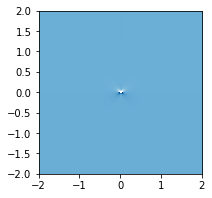

In [7]:
# plot magnetic field lines with imshow
fig, ax1 = plt.subplots(1, 1, figsize=(6,3))
ax1.imshow(quad_fieldline_mNm(Xs, 0.0, Zs), extent=[-2.0, 2.0, -2.0, 2.0], cmap='Blues', vmin=-100.0, vmax=100.0)

plt.show()

In [8]:
dq = jax.grad(pure_dip.fieldline_coordinate, argnums=(0,1,2))

@jax.jit
def distance_to_fieldline(fieldline_coordinate, x, y, z):
    surface_coordinate = pure_dip.fieldline_coordinate(x, y, z)
    distortion = jnp.linalg.norm(dq(x, y, z))*jnp.linalg.norm(jnp.array([x,y,z]))
    return jnp.sqrt(fieldline_coordinate**2 - surface_coordinate**2)/distortion

@jax.jit
def sdf_sphere(radius, x, y, z):
    """The signed distance function for a sphere of radius `radius` centered at the origin."""
    return jnp.sqrt(x**2 + y**2 + z**2) - radius

@jax.jit
def inverse_dipole_transform(x, y, z):
    radius = jnp.sqrt(x*x + y*y + z*z)
    sine_squared = 1.0/radius/pure_dip.fieldline_coordinate(x, y, z)
    x_transformed = sine_squared * x
    y_transformed = sine_squared * y
    z_transformed = sine_squared * z
    return x_transformed, y_transformed, z_transformed

@jax.jit
def dipole_transformed_distance(fieldline_coordinate, x, y, z):
    point = inverse_dipole_transform(x, y, z)
    radius = jnp.linalg.norm(jnp.array(point))
    return sdf_sphere(fieldline_coordinate, *point)*radius*pure_dip.fieldline_coordinate(*point)

In [9]:
pure_dip.fieldline_coordinate(4.0, 0.0, 0.0)

DeviceArray(0.125, dtype=float32)

In [10]:
point = jnp.array([0.5, 0.0, 0.75])
print(distance_to_fieldline(1.0, *point))
print(dipole_transformed_distance(1.0, *point))
print(pure_dip.fieldline_coordinate(*point))

1.8255991
0.74754196
0.17067695


In [11]:
@jax.jit
def raymarch(initial_point, ray_direction):
    stepsize = distance_to_fieldline(1.0, *initial_point)
    return initial_point + ray_direction*stepsize

@jax.jit
def raymarch_alt(initial_point, ray_direction):
    stepsize = jnp.max(jnp.array([dipole_transformed_distance(1.0, *initial_point), 1e-4]))
    return initial_point + ray_direction*stepsize

@jax.jit
def raymarch_sphere(initial_point, ray_direction):
    stepsize = sdf_sphere(0.5, *initial_point)
    return initial_point + ray_direction*stepsize

def intersect(initial_point, ray_direction, max_steps=100):
    while max_steps > 0 and distance_to_fieldline(1.0, *initial_point) > 1e-6:
        initial_point = raymarch(initial_point, ray_direction)
        max_steps -= 1
    return initial_point

def intersect_alt(initial_point, ray_direction, max_steps=100):
    while max_steps > 0 and dipole_transformed_distance(1.0, *initial_point) > 1.0e-6:
        old_point = initial_point
        initial_point = raymarch_alt(initial_point, ray_direction)
        max_steps -= 1
    #if dipole_transformed_distance(1.0, *initial_point) < 0.0:
    #    return old_point
    return initial_point

def intersect_sphere(initial_point, ray_direction, max_steps=100):
    while max_steps > 0 and sdf_sphere(0.5, *initial_point) > 1e-6:
        initial_point = raymarch_sphere(initial_point, ray_direction)
        max_steps -= 1
    return initial_point

In [12]:
start = jnp.array([0.3, 0.0, 0.8])
direction = jnp.array([-5.0, 0.0, -3.0])
direction = direction/jnp.linalg.norm(direction)

endpoint = raymarch(start, direction)
print("Raymarched point: ", endpoint)
print("fieldline coordinate: ", pure_dip.fieldline_coordinate(*endpoint))

endpoint_alt = raymarch_alt(start, direction)
print("Raymarched point: ", endpoint_alt)
print("fieldline coordinate: ", pure_dip.fieldline_coordinate(*endpoint_alt))

endpoint_sphere = raymarch

Raymarched point:  [-1.8845772  0.        -0.5107463]
fieldline coordinate:  0.23855267
Raymarched point:  [-0.37978348  0.          0.39212993]
fieldline coordinate:  0.44331738


In [13]:
endpoint = raymarch(endpoint, direction)
print("Raymarched point: ", endpoint)
print("fieldline coordinate: ", pure_dip.fieldline_coordinate(*endpoint))
print("Distance from intersection point: ", distance_to_fieldline(1.0, *endpoint))

endpoint_alt = raymarch_alt(endpoint_alt, direction)
print("Raymarched point: ", endpoint_alt)
print("fieldline coordinate: ", pure_dip.fieldline_coordinate(*endpoint_alt))
print("Distance from intersection point: ", dipole_transformed_distance(1.0, *endpoint_alt))

Raymarched point:  [-4.953535   0.        -2.3521209]
fieldline coordinate:  0.07440477
Distance from intersection point:  9.718566
Raymarched point:  [-0.6403672  0.         0.2357797]
fieldline coordinate:  0.64524055
Distance from intersection point:  0.2420859


Intersection point:  [-inf  nan -inf]
fieldline coordinate:  nan
Distance from intersection point:  nan
Intersection point:  [-9.059667e+16  0.000000e+00 -4.529834e+17]
fieldline coordinate:  4.162913e-20
Distance from intersection point:  nan
Intersection point:  [-inf  nan -inf]
Distance from intersection point:  nan
Distance from intersection point:  nan


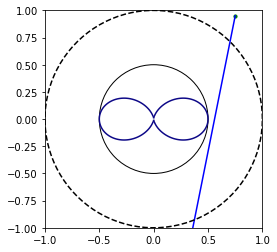

In [14]:
start = jnp.array([0.75, 0.0, 0.95])
direction = jnp.array([-2.0, 0.0, -10.0])
direction = direction/jnp.linalg.norm(direction)

dipfieldline_vNv = jax.vmap(pure_dip.fieldline_coordinate, in_axes=(0,None,0), out_axes=0)
dipfieldline_mNm = jax.vmap(dipfieldline_vNv, in_axes=(1,None,1), out_axes=0)

plt.contour(Zs, Xs, dipfieldline_mNm(Xs, 0.0, Zs), [1.0], cmap='plasma')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')

endpoint = intersect(start, direction, max_steps=100)
print("Intersection point: ", endpoint)
print("fieldline coordinate: ", pure_dip.fieldline_coordinate(*endpoint))
print("Distance from intersection point: ", distance_to_fieldline(1.0, *endpoint))

endpoint_alt = intersect_alt(start, direction, max_steps=100)
print("Intersection point: ", endpoint_alt)
print("fieldline coordinate: ", pure_dip.fieldline_coordinate(*endpoint_alt))
print("Distance from intersection point: ", dipole_transformed_distance(1.0, *endpoint_alt))

endpoint_sphere = intersect_sphere(start, direction, max_steps=100)
print("Intersection point: ", endpoint_sphere)
print("Distance from intersection point: ", sdf_sphere(1.0, *endpoint_sphere))
print("Distance from intersection point: ", jnp.linalg.norm(endpoint_sphere - start))

plt.scatter(start[0], start[2], c='g', s=10.0)
plt.scatter(endpoint[0], endpoint[2], c='r', s=10.0)
plt.scatter(endpoint_alt[0], endpoint_alt[2], c='b', s=10.0)
plt.scatter(endpoint_sphere[0], endpoint_sphere[2], c='k', s=10.0)
plt.plot([start[0], endpoint_alt[0]], [start[2], endpoint_alt[2]], c='b')

circle = plt.Circle((0.0, 0), 0.5, color='k', fill=False)
plt.gca().add_artist(circle)

# dotted circle of radius 1
t = jnp.linspace(0, 2*jnp.pi, 100)
plt.plot(jnp.cos(t), jnp.sin(t), '--', c='k')

plt.show()